In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.preprocessing  import LabelEncoder     
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [3]:
#Import Data 
train = pd.read_csv("D:/Pribadi/Visual Code/BRI/bri-data-hackathon-pa/train.csv")
test = pd.read_csv("D:/Pribadi/Visual Code/BRI/bri-data-hackathon-pa/test.csv")
print('\033[92m' +' Train Info:\033[0m')
print(train.info())
print('\n')
print('\033[92m' +' Train Info:\033[0m')
print(test.info())

 Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
job_level                                11153 non-null object
job_duration_in_current_job_level        11153 non-null float64
person_level                             11153 non-null object
job_duration_in_current_person_level     11153 non-null float64
job_duration_in_current_branch           11153 non-null float64
Employee_type                            11153 non-null object
gender                                   11153 non-null int64
age                                      11153 non-null int64
marital_status_maried(Y/N)               11153 non-null object
number_of_dependences                    11153 non-null int64
Education_level                          11153 non-null object
GPA                                      11153 non-null float64
year_graduated                           11153 non-null int64
job_duration_from_training               11153 non-null int

In [4]:
test.loc[test['job_level'] == 'JG06', 'job_level'] = 'JG05'
train.loc[train['person_level'] == 'PG08', 'person_level'] = 'PG07'

In [5]:
df_all = concat_df(train, test)

In [6]:
df_all['age']= 2020 - df_all['age']

In [7]:
abs(df_all.corr())

,Achievement_above_100%_during3quartal,Best Performance,GPA,Last_achievement_%,age,annual leave,assign_of_otherposition,branch_rotation,gender,job_duration_from_training,job_duration_in_current_branch,job_duration_in_current_job_level,job_duration_in_current_person_level,job_rotation,number_of_dependences,sick_leaves,year_graduated
Achievement_above_100%_during3quartal,1.000000,0.004723,0.018061,0.734623,0.095569,0.013641,0.077020,0.077231,0.007195,0.095990,0.006029,0.071688,0.030504,0.115050,0.095843,0.015636,0.105285
Best Performance,0.004723,1.000000,0.007742,0.012643,0.018997,0.010251,0.007268,0.016063,0.019048,0.019229,0.017283,0.006968,0.016159,0.007690,0.009967,0.011206,0.008495
GPA,0.018061,0.007742,1.000000,0.018540,0.053864,0.004253,0.019665,0.060123,0.020379,0.072001,0.008434,0.047735,0.013508,0.060916,0.032514,0.002997,0.041580
Last_achievement_%,0.734623,0.012643,0.018540,1.000000,0.150622,0.023578,0.101182,0.127953,0.005681,0.147759,0.002287,0.103562,0.060025,0.149292,0.138621,0.029535,0.164392
age,0.095569,0.018997,0.053864,0.150622,1.000000,0.042607,0.218474,0.756141,0.090609,0.883389,0.029773,0.593383,0.382611,0.682444,0.472716,0.022807,0.833671
annual leave,0.013641,0.010251,0.004253,0.023578,0.042607,1.000000,0.007341,0.034404,0.086123,0.025014,0.018477,0.035009,0.010273,0.008275,0.017356,0.039329,0.031439
assign_of_otherposition,0.077020,0.007268,0.019665,0.101182,0.218474,0.007341,1.000000,0.225147,0.031987,0.227559,0.022204,0.176002,0.099607,0.201439,0.149636,0.028923,0.202885
branch_rotation,0.077231,0.016063,0.060123,0.127953,0.756141,0.034404,0.225147,1.000000,0.090999,0.848803,0.125419,0.587239,0.301969,0.792171,0.386073,0.021742,0.690249
gender,0.007195,0.019048,0.020379,0.005681,0.090609,0.086123,0.031987,0.090999,1.000000,0.134612,0.016502,0.056332,0.027234,0.115489,0.055279,0.096424,0.126348
job_duration_from_training,0.095990,0.019229,0.072001,0.147759,0.883389,0.025014,0.227559,0.848803,0.134612,1.000000,0.038018,0.677085,0.424957,0.780502,0.433608,0.020169,0.770703


In [8]:
#Misiing Value
df_all['Last_achievement_%'] = df_all.groupby(['job_duration_from_training','age','job_rotation'])['Last_achievement_%'].apply(lambda x: x.fillna(x.median()))
df_all['Achievement_above_100%_during3quartal'] = df_all.groupby(['Last_achievement_%'])['Achievement_above_100%_during3quartal'].apply(lambda x: x.fillna(x.median()))

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17153 entries, 0 to 17152
Data columns (total 22 columns):
Achievement_above_100%_during3quartal    17153 non-null float64
Best Performance                         11153 non-null float64
Education_level                          17153 non-null object
Employee_type                            17153 non-null object
GPA                                      17153 non-null float64
Last_achievement_%                       17153 non-null float64
age                                      17153 non-null int64
annual leave                             17153 non-null int64
assign_of_otherposition                  17153 non-null int64
branch_rotation                          17153 non-null int64
gender                                   17153 non-null int64
job_duration_from_training               17153 non-null int64
job_duration_in_current_branch           17153 non-null float64
job_duration_in_current_job_level        17153 non-null float64
job_durat

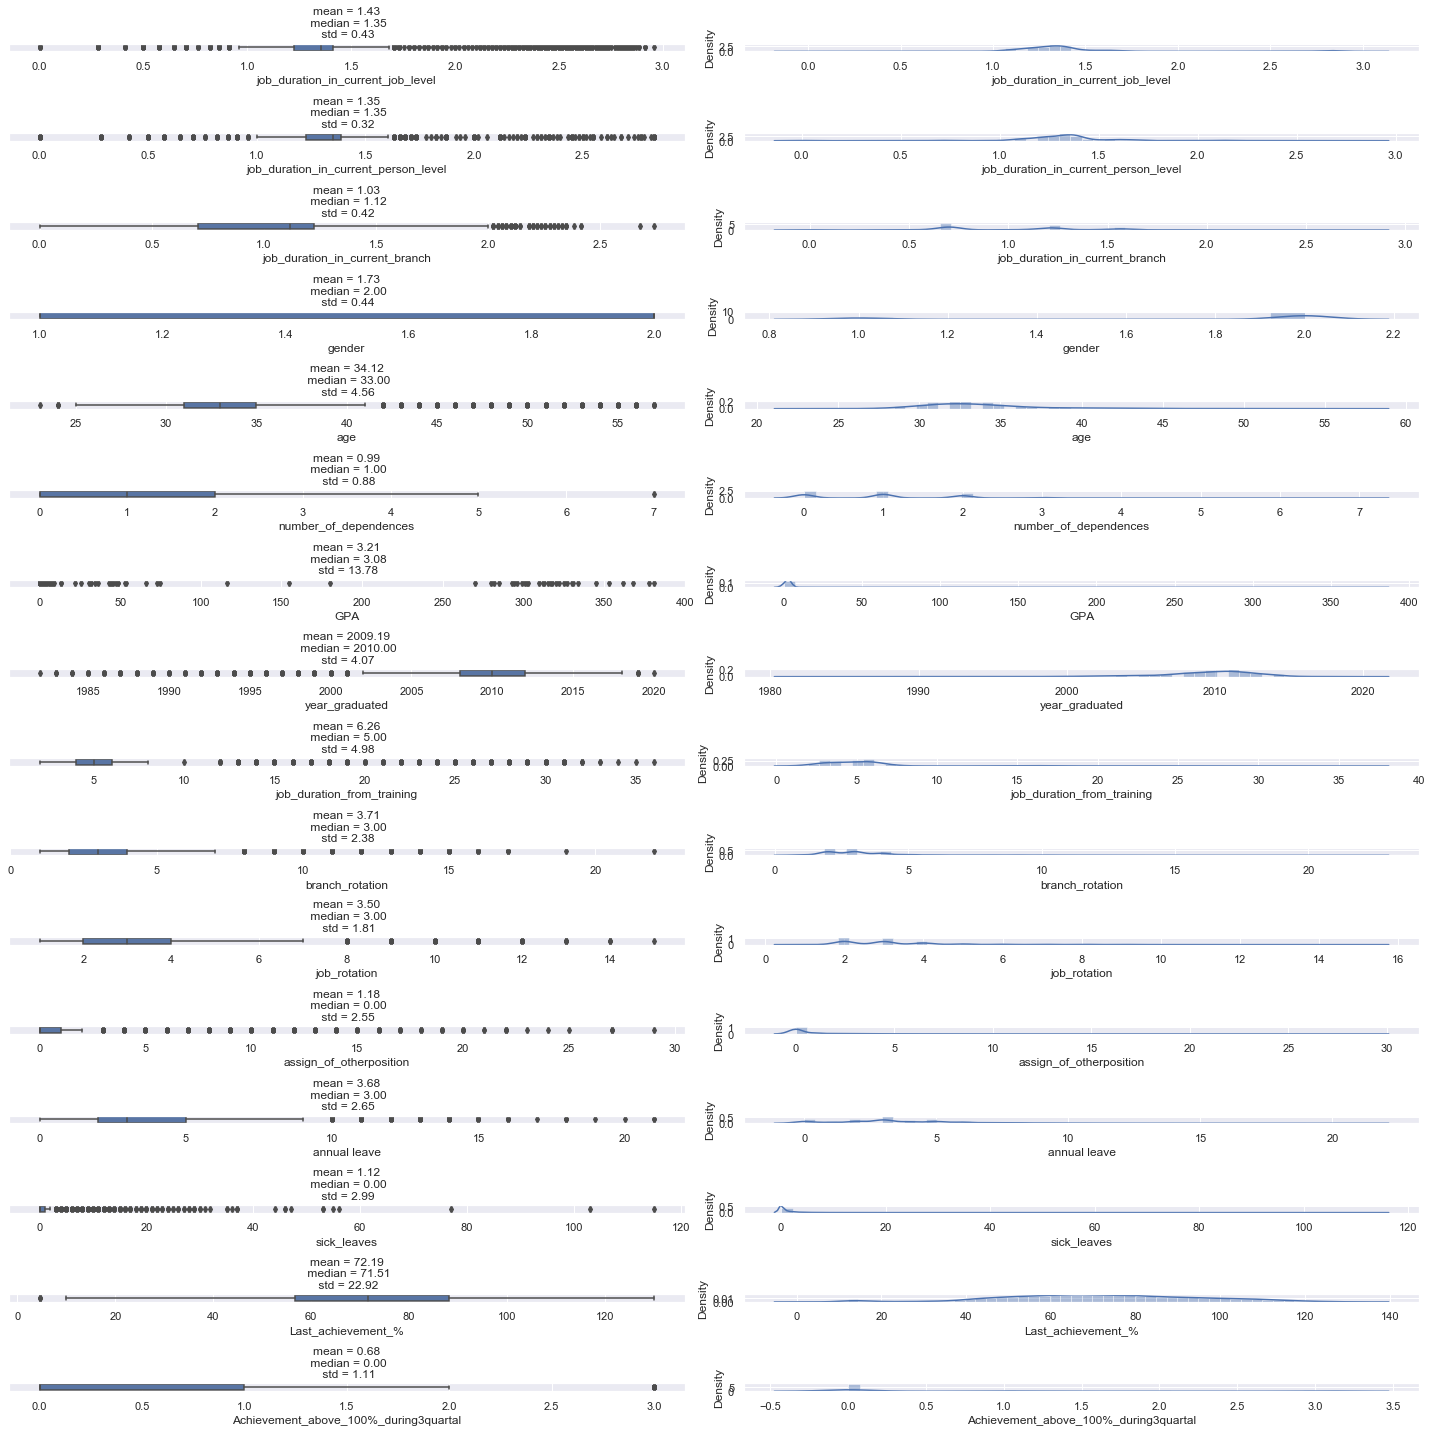

In [10]:
## Deskriptiv Statistics
# Fungsi untuk membuat plot  
def sebarandata(features):  
    fig, axs = plt.subplots(16, 2, figsize=(20, 20))
    for i, kol in enumerate(features):
	    sns.boxplot(df_all[kol], ax = axs[i][0])
	    sns.distplot(df_all[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df_all[kol].mean(), df_all[kol].median(), df_all[kol].std()))
    plt.tight_layout()
    plt.show()
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['job_duration_in_current_job_level','job_duration_in_current_person_level','job_duration_in_current_branch','gender', 'age','number_of_dependences' ,'GPA', 'year_graduated', 'job_duration_from_training','branch_rotation','job_rotation', 'assign_of_otherposition','annual leave','sick_leaves','Last_achievement_%','Achievement_above_100%_during3quartal']
sebarandata(kolom_numerik)

In [11]:
df_all['Ketidakhadiran'] = df_all['sick_leaves'] + df_all['annual leave']

In [12]:
df_all = df_all.drop(['sick_leaves','annual leave'], axis = 1)

In [13]:
df_all['age'] = pd.qcut(df_all['age'], 4, labels=['1','2','3','4'])
df_all['Ketidakhadiran'] = pd.qcut(df_all['Ketidakhadiran'], 5, labels=['1','2','3','4','5'], duplicates='drop')
df_all['GPA'] = pd.qcut(df_all['GPA'], 5, labels=['1','2','3','4','5'], duplicates='drop')

In [17]:
kolom_numerik = ['job_duration_in_current_job_level','job_duration_in_current_person_level','job_duration_in_current_branch','year_graduated','job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition','Last_achievement_%', 'number_of_dependences']

In [18]:
## Standarisasi
df_std = StandardScaler().fit_transform(df_all[kolom_numerik])
# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df_all.index, columns=df_all[kolom_numerik].columns)


In [19]:
kolom_kategorik = ['job_level','person_level','Employee_type','age','gender','marital_status_maried(Y/N)','Education_level','Ketidakhadiran','GPA']

<Figure size 432x288 with 0 Axes>

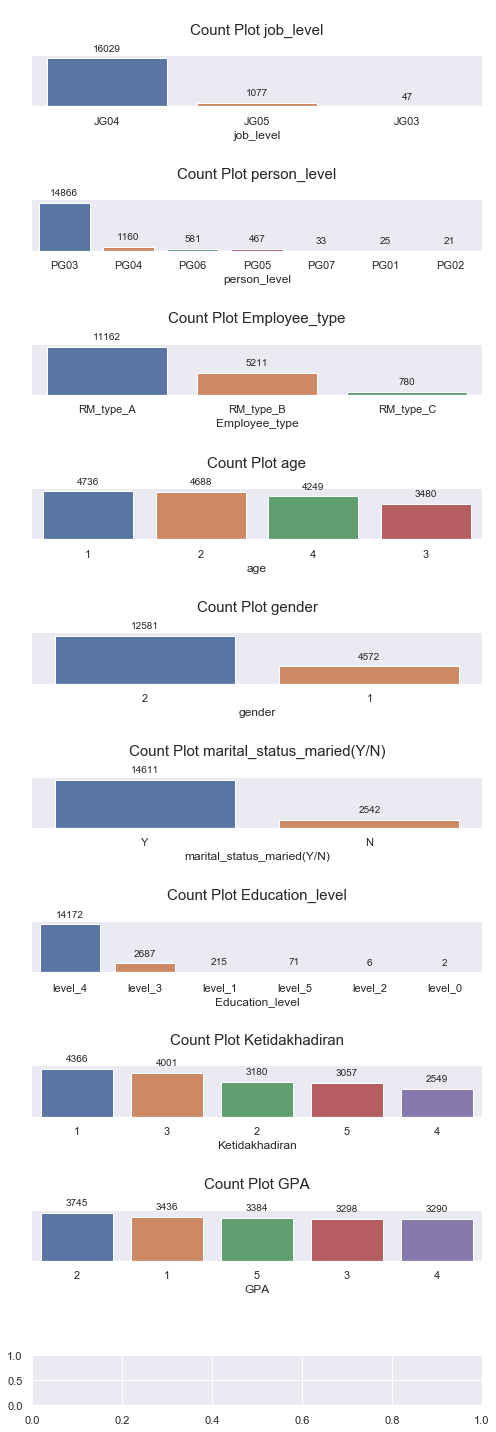

In [20]:
#sebaran data Katagorik
plt.clf() 
# Membuat canvas
fig, axs = plt.subplots(10,1,figsize=(7,20)) 
# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorik):  
    # Membuat Plot
    sns.countplot(df_all[kol], order = df_all[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points')      
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.tight_layout()

# Tampilkan plot
plt.show()

In [21]:
#Membuat salinan data frame
df_encode = df_all[kolom_kategorik].copy()
# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorik:
		df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

In [22]:
#menggabungkan data frame
df_all = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
df_all = df_all.merge(train['Best Performance'], left_index = True, right_index=True, how = 'left')

In [23]:
train = df_all.loc[:11152]
test = df_all.loc[11153:]
dfs = [train, test]

In [24]:
test = test.drop(['Best Performance'], axis = 1)

In [27]:
cat_features = ['job_level','person_level','Employee_type','age','gender','marital_status_maried(Y/N)','Education_level','Ketidakhadiran','GPA']

In [29]:
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)


In [30]:
train = pd.concat([train, *encoded_features[:9]], axis=1)
test = pd.concat([test, *encoded_features[9:]], axis=1)

In [31]:
train = train.drop(train[cat_features],axis = 1)
test = test.drop(test[cat_features],axis = 1)

In [32]:
X = train.drop(['Best Performance'], axis = 1)
Y = train['Best Performance'].values

In [33]:
# CONFIG
SEED = 2021

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, 
                                                      random_state = SEED, stratify = Y)

In [36]:
## Cek Model
from sklearn.metrics import *

In [37]:
from catboost import CatBoostClassifier

In [38]:
model4 = CatBoostClassifier(objective='Logloss',boosting_type='Plain',random_state=SEED)
model4.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)])

: 0.4255362	best: 0.4106855 (118)	total: 7.46s	remaining: 2.12s
779:	learn: 0.2642480	test: 0.4257159	best: 0.4106855 (118)	total: 7.47s	remaining: 2.11s
780:	learn: 0.2640131	test: 0.4256910	best: 0.4106855 (118)	total: 7.48s	remaining: 2.1s
781:	learn: 0.2638579	test: 0.4258383	best: 0.4106855 (118)	total: 7.49s	remaining: 2.09s
782:	learn: 0.2636792	test: 0.4258433	best: 0.4106855 (118)	total: 7.5s	remaining: 2.08s
783:	learn: 0.2635471	test: 0.4257940	best: 0.4106855 (118)	total: 7.51s	remaining: 2.07s
784:	learn: 0.2633388	test: 0.4258647	best: 0.4106855 (118)	total: 7.52s	remaining: 2.06s
785:	learn: 0.2632084	test: 0.4259528	best: 0.4106855 (118)	total: 7.53s	remaining: 2.05s
786:	learn: 0.2630666	test: 0.4260263	best: 0.4106855 (118)	total: 7.54s	remaining: 2.04s
787:	learn: 0.2629596	test: 0.4259923	best: 0.4106855 (118)	total: 7.54s	remaining: 2.03s
788:	learn: 0.2627208	test: 0.4261172	best: 0.4106855 (118)	total: 7.55s	remaining: 2.02s
789:	learn: 0.2625411	test: 0.4263423	

In [39]:
pred4 = model4.predict_proba(X_valid)
model_auc = roc_auc_score(Y_valid, pred4[:, 1])
print(f"AUC score untuk model adalah sebesar : {model_auc}")

AUC score untuk model adalah sebesar : 0.5738008506154756


In [40]:
#model_pred = model4.predict_proba(test)

In [41]:
#sample = pd.read_csv("D:/Pribadi/Visual Code/BRI/bri-data-hackathon-pa/sample_submission.csv")
#sample["Best Performance"] = model_pred[:, 1]
#sample.to_csv("D:/Pribadi/Visual Code/BRI/bri-data-hackathon-pa/Catboost.csv", index = False)